Análise de redes sociais em Python com NetworkX

In [1]:
# Instalar as bibliotecas utilizando o pip
!pip install networkx
!pip install matplotlib

In [2]:
# Importar as bibliotecas 
import networkx as nx
import matplotlib.pyplot as plt 
import numpy as np

1. Análise de rede social usando Python

1.1 Conceitos básicos

Elementos básicos de uma rede:

• Vértices (nós): entidades/pessoas da rede. 
• Arestas (linhas): conexão entre os nós da rede.

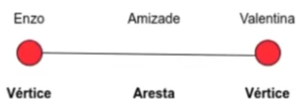

1.1.1 Redes Simétricas (ex: Facebook)

A relação de amigos do Facebook forma uma rede simétrica, pois se Enzo é amigo de Valentina, então necessariamente Valentina é amiga de Enzo. 
Vamos criar a nossa primeira rede de amigos do Facebook.

In [3]:
# Criando nossa rede simétrica 
G_Fb = nx.Graph()

G_Fb.add_edge('Maria', 'João')
G_Fb.add_edge('João', 'Enzo')
G_Fb.add_edge('Enzo', 'Maria')
G_Fb.add_edge('Maria', 'Valentina')

In [4]:
# Mostrar informações da nossa rede
print("Número de nós:", G_Fb.number_of_nodes())
print("Número de arestas:", G_Fb.number_of_edges())
print("Grau médio:", sum(dict(G_Fb.degree()).values()) / G_Fb.number_of_nodes())

print("Direcionado:", G_Fb.is_directed())

# Mostrando informações sobre o grafo
#print(nx.info(G_Fb))

Número de nós: 4
Número de arestas: 4
Grau médio: 2.0
Direcionado: False


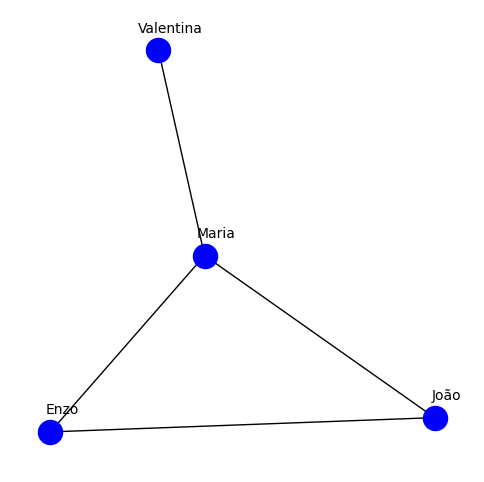

In [5]:
# Configuração de visualização
plt.figure(figsize=(6,6)) 
plt.axis("off")

# Manter a rede na mesma posição 
np.random.seed(0)

# Criar o layout da nossa rede 
position = nx.spring_layout(G_Fb)

# Desenhar a rede
nx.draw_networkx(G_Fb, pos=position, node_color='blue', font_size=0)

# Desenhar os rótulos com um deslocamento
offset_position = {node: (pos[0] + 0.02, pos[1] + 0.09) for node, pos in position.items()}
nx.draw_networkx_labels(G_Fb, pos=offset_position, font_size=10, font_color="black")

plt.show()

In [6]:
#Usar o algoritmo de shortest path
nx.shortest_path(G_Fb, 'João', 'Valentina')

['João', 'Maria', 'Valentina']

1.1.2 Redes Assimétricas (ex: Instagram)

Vamos criar a nossa rede de seguidores do Instagram. Nesse caso a nossa rede é assimétrica, porque Enzo pode seguir Valentina, porém Valentina pode seguir Enzo ou não.

Vamos criar a nossa rede de seguidores do Instagram.

In [7]:
# Criando nossa rede assimétrica 
G_In = nx.DiGraph()

G_In.add_edge('Maria', 'João')
G_In.add_edge('João', 'Enzo')
G_In.add_edge('Enzo', 'Maria')
G_In.add_edge('Maria', 'Valentina') 
G_In.add_edge('Valentina', 'Maria')

In [8]:
# Mostrar informações da nossa rede
#print(nx.info(G_In))

# Mostrando informações sobre o grafo
print("Número de nós:", G_In.number_of_nodes())
print("Número de arestas:", G_In.number_of_edges())
print("Grau médio de entrada:", sum(dict(G_In.in_degree()).values()) / G_In.number_of_nodes())
print("Grau médio de saída:", sum(dict(G_In.out_degree()).values()) / G_In.number_of_nodes())

Número de nós: 4
Número de arestas: 5
Grau médio de entrada: 1.25
Grau médio de saída: 1.25


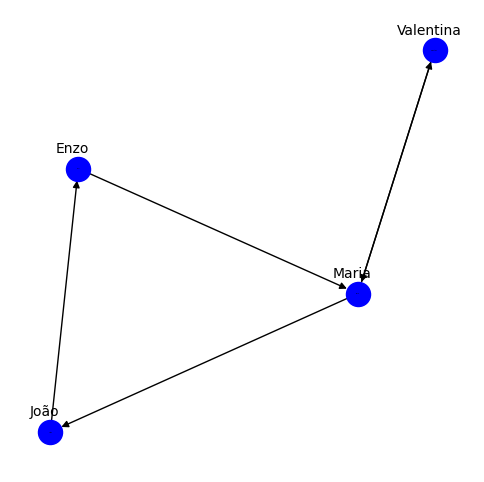

In [9]:
# Configuração de visualização
plt.figure(figsize=(6,6)) 
plt.axis("off")

# Manter a rede na mesma posição 
np.random.seed(0)

# Criar o layout da nossa rede 
position = nx.spring_layout(G_In)

# Desenhar a rede
nx.draw_networkx(G_In, pos=position, node_color='blue', font_size=0)

# Desenhar os rótulos com um deslocamento
offset_position = {node: (pos[0] - 0.02, pos[1] + 0.10) for node, pos in position.items()}
nx.draw_networkx_labels(G_In, pos=offset_position, font_size=10, font_color="black")

plt.show()

1.2 Métricas básicas

1.2.1 Qual pessoa que tem mais seguidores?

In [10]:
# Calcular o grau de centralidade
nx.degree_centrality(G_In)

{'Maria': 1.3333333333333333,
 'João': 0.6666666666666666,
 'Enzo': 0.6666666666666666,
 'Valentina': 0.6666666666666666}

1.2.2 Calcular o menor caminho entre duas pessoas

In [11]:
#Usar o algoritmo de shortest path
nx.shortest_path(G_In, 'João', 'Valentina')

['João', 'Enzo', 'Maria', 'Valentina']

2. Análise com exemplo real do Facebook

Vamos usar um conjunto de dados de listas de amigos do Facebook. Os dados foram coletados dos participantes de uma pesquisa através do aplicativo do Facebook.

2.1. Carregar e visualizar os dados

O conjunto de dados está disponível publicamente no site da universidade de Stanford: https://snap.stanford.edu/data/ego-Facebook.html

In [12]:
!pip install scipy

In [13]:
#!pip install --upgrade scipy

In [14]:
#carregar os dados
G_FB = nx.read_edgelist("data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [15]:
# Mostrar informações da nossa rede
#print(nx.info(G_FB))

# Mostrar informações da nossa rede
print("Número de nós:", G_FB.number_of_nodes())
print("Número de arestas:", G_FB.number_of_edges())
print("Grau médio:", sum(dict(G_FB.degree()).values()) / G_FB.number_of_nodes())

Número de nós: 4039
Número de arestas: 88234
Grau médio: 43.69101262688784


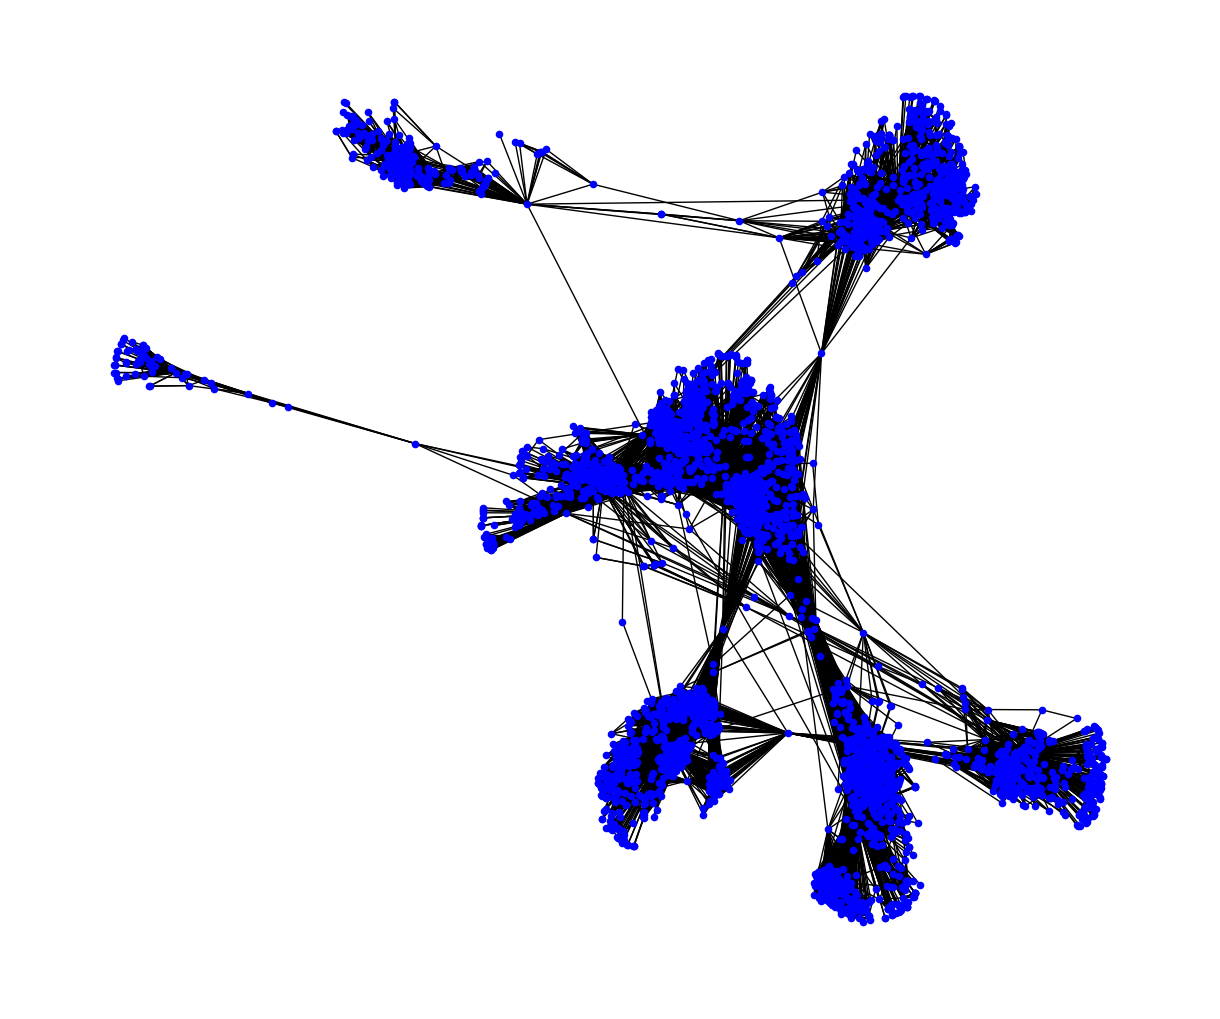

In [16]:
#Aumentar o tamanho da figura usando o matplotlib 
plt.figure(figsize=(12,10))

#Criar o layout da nossa rede 
spring_pos = nx.spring_layout (G_FB)

#Desenhar a nossa rede
nx.draw(G_FB, node_size=20, pos=spring_pos, node_color='blue')

2.2. Detectar as comunidades

In [17]:
# Instalar a biblioteca
!pip install python-louvain

Documentação do NetworkX descrevendo o uso do algoritmo de detecção de comunidades: https://python-louvain.readthedocs.io/en/latest/

In [18]:
# Importar nosso algoritmo de detecção de comunidades
from community import community_louvain

In [19]:
#Computar os grupos
partitions = community_louvain.best_partition(G_FB)

# Transformar os valores em lista 
values = list(partitions.values())

In [20]:
# numero esquerda representa uma pessoa, numero direita representa comunidades
partitions

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 9,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [21]:
# lista das comunidades detectadas
values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


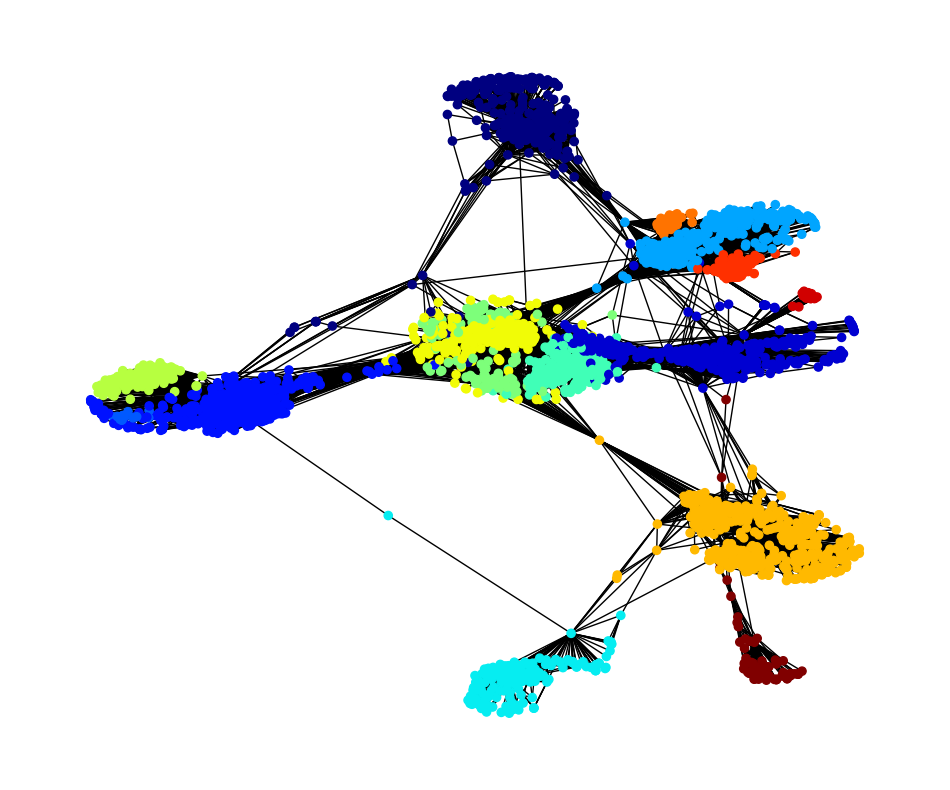

In [22]:
# Definir semente de aleatoriedade para resultados consistentes
np.random.seed(42)

# Calcula o layout da posição dos nós uma vez
spring_pos = nx.spring_layout(G_FB, seed=42)

# Obtendo as comunidades com o algoritmo de Louvain
partitions = community_louvain.best_partition(G_FB)
values = list(partitions.values())

# Identificar as comunidades e definir uma cor para cada uma
unique_communities = set(values)
colors = plt.get_cmap("jet")(np.linspace(0, 1, len(unique_communities)))
color_map = {community: colors[i] for i, community in enumerate(unique_communities)}

# Mapeando as cores para cada nó com base na sua comunidade
node_colors = [color_map[partitions[node]] for node in G_FB.nodes()]


# Desenhando o grafo com cores por comunidade
plt.figure(figsize=(12, 10))
plt.axis("off")
nx.draw_networkx(G_FB, pos=spring_pos, node_color=node_colors, 
                 node_size=35, with_labels=False)


# # Adicionando uma legenda para as comunidades
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[community], 
#                       markersize=10, label=f'Comunidade {community}') 
#            for community in unique_communities]
# plt.legend(handles=handles, loc='best', title="Comunidades")

plt.show()

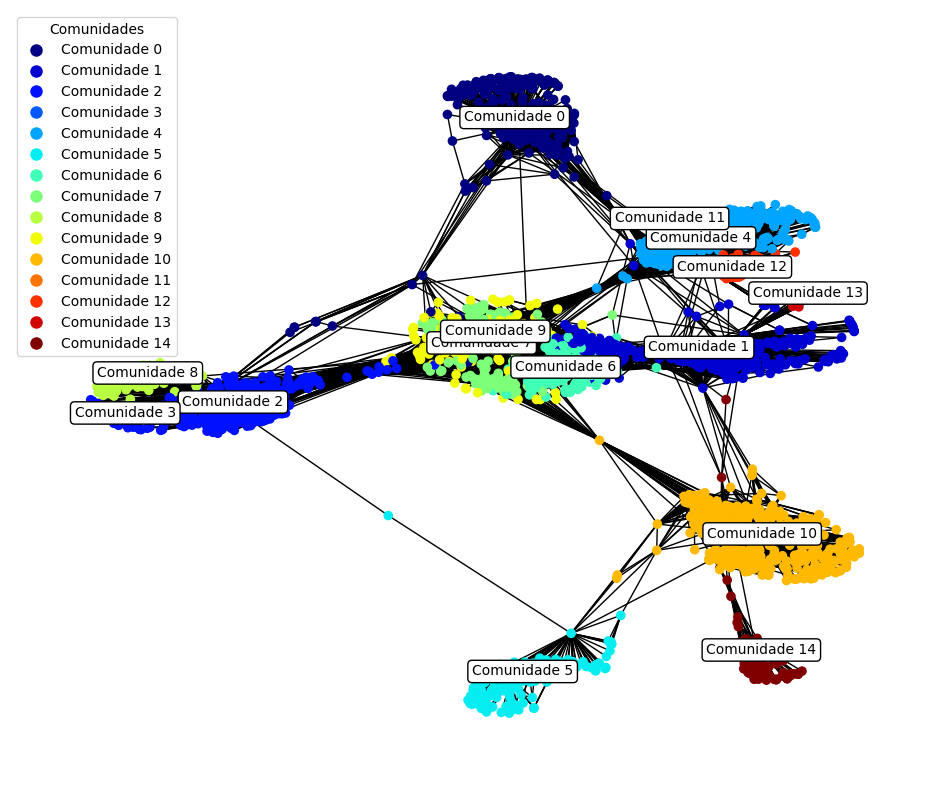

In [23]:
# Definir semente de aleatoriedade para resultados consistentes
np.random.seed(42)

# Calcula o layout da posição dos nós uma vez
spring_pos = nx.spring_layout(G_FB, seed=42)

# Obtendo as comunidades com o algoritmo de Louvain
partitions = community_louvain.best_partition(G_FB)
values = list(partitions.values())

# Identificar as comunidades e definir uma cor para cada uma
unique_communities = set(values)
colors = plt.get_cmap("jet")(np.linspace(0, 1, len(unique_communities)))
color_map = {community: colors[i] for i, community in enumerate(unique_communities)}

# Mapeando as cores para cada nó com base na sua comunidade
node_colors = [color_map[partitions[node]] for node in G_FB.nodes()]

# Calculando o centroide de cada comunidade
community_centroids = {}
for community in unique_communities:
    # Seleciona os nós da comunidade
    nodes_in_community = [node for node in G_FB.nodes() if partitions[node] == community]
    # Calcula o centroide
    x_coords = [spring_pos[node][0] for node in nodes_in_community]
    y_coords = [spring_pos[node][1] for node in nodes_in_community]
    community_centroids[community] = (np.mean(x_coords), np.mean(y_coords))

# Desenhando o grafo com cores por comunidade
plt.figure(figsize=(12, 10))
plt.axis("off")
nx.draw_networkx(G_FB, pos=spring_pos, node_color=node_colors, 
                 node_size=35, with_labels=False)

# Adicionando os rótulos para cada comunidade no centroide calculado
for community, (x, y) in community_centroids.items():
    plt.text(x, y, f'Comunidade {community}', fontsize=10, ha='center', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Adicionando uma legenda para as comunidades
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[community], 
                      markersize=10, label=f'Comunidade {community}') 
           for community in unique_communities]
plt.legend(handles=handles, loc='best', title="Comunidades")

plt.show()

2.3. Separar uma comunidade
Vamos primeiro verificar quantas comunidades foram detectadas pelo o algoritmo.

In [24]:
list(set(values))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [25]:
#Separar uma comunidade (cluster) neste caso de [0 ... 15]
cluster_id = 10

# Para cada nó verifica o dicionario partiçoes é = ao meu cluster_id e sendo positivo/verdadeiro retorna meu nó se nao passa para o proximo
cluster = [node for node in G_FB.nodes() if partitions[node] == cluster_id]

In [26]:
# Lista das cominidades do cluster_id escolhido
cluster

[1085,
 3437,
 3454,
 3487,
 3723,
 3861,
 3961,
 857,
 862,
 865,
 868,
 3456,
 3495,
 3586,
 3621,
 3626,
 3797,
 3501,
 3517,
 3550,
 3577,
 3592,
 3609,
 3633,
 3677,
 3684,
 3721,
 3779,
 3872,
 3948,
 3440,
 3525,
 3540,
 3556,
 3561,
 3651,
 3674,
 3692,
 3741,
 3750,
 3756,
 3830,
 3851,
 3877,
 3886,
 3943,
 3962,
 3438,
 3439,
 3441,
 3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3449,
 3450,
 3451,
 3452,
 3453,
 3455,
 3457,
 3458,
 3459,
 3460,
 3461,
 3462,
 3463,
 3464,
 3465,
 3466,
 3467,
 3468,
 3469,
 3470,
 3471,
 3472,
 3473,
 3474,
 3475,
 3476,
 3477,
 3478,
 3479,
 3480,
 3481,
 3482,
 3483,
 3484,
 3485,
 3486,
 3488,
 3489,
 3490,
 3491,
 3492,
 3493,
 3494,
 3496,
 3497,
 3498,
 3499,
 3500,
 3502,
 3503,
 3504,
 3505,
 3506,
 3507,
 3508,
 3509,
 3510,
 3511,
 3512,
 3513,
 3514,
 3515,
 3516,
 3518,
 3519,
 3520,
 3521,
 3522,
 3523,
 3524,
 3526,
 3527,
 3528,
 3529,
 3530,
 3531,
 3532,
 3533,
 3534,
 3535,
 3536,
 3537,
 3538,
 3539,
 3541,
 3542,
 35

In [27]:
# Criar um subgraph passando os nós selecionados 
cluster = G_FB.subgraph(cluster)

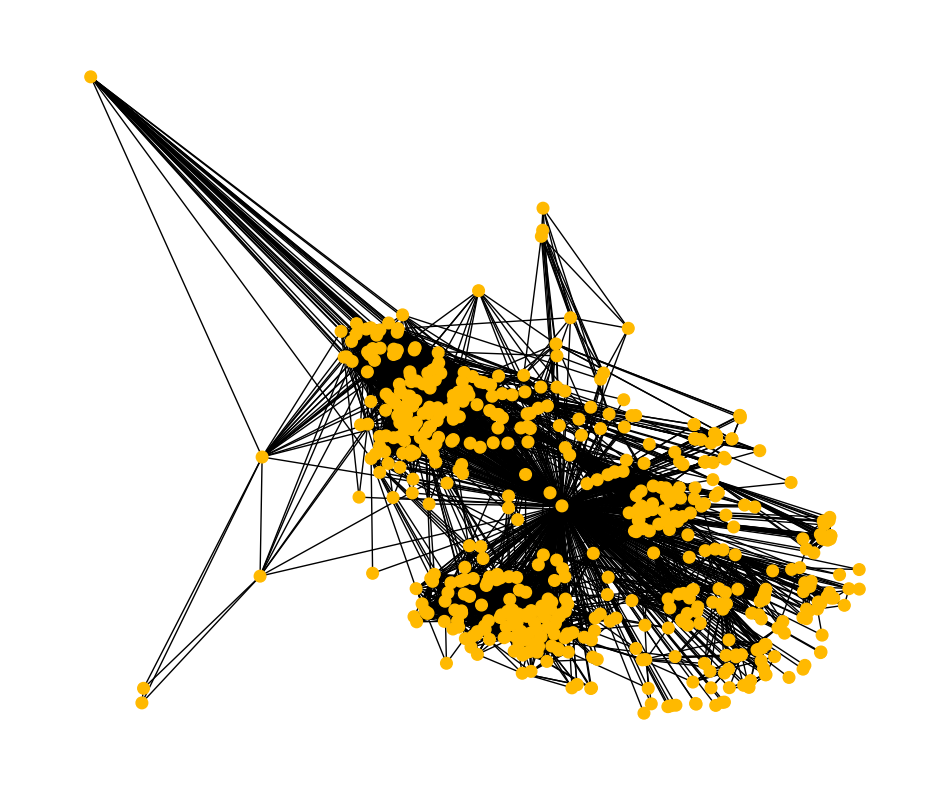

In [28]:
plt.figure(figsize=(12, 10))

# Filtrar as posições apenas para os nós na comunidade
cluster_pos = {node: spring_pos[node] for node in cluster}

# Usar a mesma cor da comunidade especificada
cluster_color = color_map[cluster_id]

# Desenhar a comunidade com o layout e cor da visualização anterior
nx.draw_networkx(cluster, pos=cluster_pos, node_color=[cluster_color] * len(cluster), 
                 node_size=70, with_labels=False)

plt.axis("off")
plt.show()

Com um conjunto de features de cada pessoa da nossa rede, nós podemos identificar quais as caraterísticas que predominam em cada grupo e definir
diferentes perfis. Com essas informações nós podemos sugerir diferentes conteúdos e produtos para cada perfil.